<a href="https://colab.research.google.com/github/muid-uddin-chowdhury/ETE_456/blob/main/Lab_06_Deep_neural_networks_1608030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ETE-456: Deep Learning Project on Diabetes Dataset**

    Objective:

        1) Classification problems using Deep Neural Network.
        2) Develop DNN models using Tensorflow Framework


**Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

  1)  Pregnancies: Number of times pregnant
  2) Glucose: Plasma glucose concentration a 2 hours in an oral glucose    tolerance test
  3) BloodPressure: Diastolic blood pressure (mm Hg)
  4) SkinThickness: Triceps skin fold thickness (mm)
  5) Insulin: 2-Hour serum insulin (mu U/ml)
  6) BMI: Body mass index (weight in kg/(height in m)^2)
  7) DiabetesPedigreeFunction: Diabetes pedigree function
  8) Age: Age (years)
  9) Outcome: Class variable (0 or 1)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

Importing Libaries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Downloading Dataset

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-21 04:59:43--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-21 04:59:43--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc758a27387791f4eaa1018b17af.dl.dropboxusercontent.com/cd/0/inline/BcMydMAC98HJ3ZQdKVhXyLr9--f1dc5yXOXO8tVqMht1gzRvVeqaYisuq5LfqiGyGe1j96FcfJwS7jdgjQj4meDzMoj4sHb41HA1m6wLSeD85yCbalS-c1FEk2rgL9w0VfkjooYseDqpftz4FdW2WFH0/file# [following]
--2021-12-21 04:59:43--  https://uc758a27387791f4eaa1018b17af.dl.dropboxusercontent.com/cd/0/inline/BcMydMAC98HJ3ZQdKVhXyLr9--f1dc5yXOXO8tVqMht1gzRvVeqaYisuq5LfqiGyGe1j96FcfJwS7jdgjQj4m

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature = dataset[[	'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']] 
target = dataset[['Outcome']]

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Implementing Data on mising values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [ ]:
feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]= imputer.transform(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(target[['Outcome']])

In [ ]:
target[['Outcome']]= imputer.transform(target[['Outcome']])

In [ ]:
target

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


Splitting Dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,4.0,142.0,86.0,0.0,0.0,44.0,0.645,22.0
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


Feature Scaling

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Training the model

In [ ]:
history = model.fit(X_train, y_train, epochs=80, validation_split=0.2)

Epoch 1/80
16/16 [==============================] - 2s 30ms/step - loss: 0.6248 - accuracy: 0.6823 - val_loss: 0.5738 - val_accuracy: 0.7642
Epoch 2/80
16/16 [==============================] - 0s 10ms/step - loss: 0.5546 - accuracy: 0.7454 - val_loss: 0.5307 - val_accuracy: 0.8130
Epoch 3/80
16/16 [==============================] - 0s 6ms/step - loss: 0.5177 - accuracy: 0.7617 - val_loss: 0.5008 - val_accuracy: 0.8130
Epoch 4/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4923 - accuracy: 0.7780 - val_loss: 0.4849 - val_accuracy: 0.8130
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7780 - val_loss: 0.4795 - val_accuracy: 0.8049
Epoch 6/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7841 - val_loss: 0.4776 - val_accuracy: 0.7967
Epoch 7/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4553 - accuracy: 0.7923 - val_loss: 0.4787 - val_accuracy: 0.7886
Epoch 8/80
16/16 [

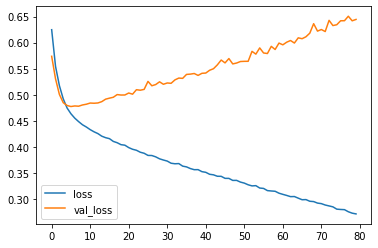

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

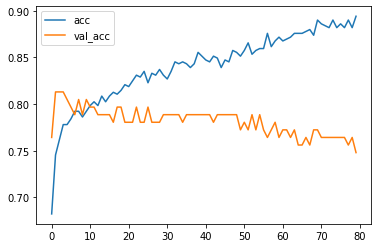

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

,Outcome
661,1.0
122,0.0
113,0.0
14,1.0
529,0.0
...,...
476,1.0
482,0.0
230,1.0
527,0.0


In [ ]:
y_pred

array([[9.99323845e-01],
       [2.83749104e-02],
       [9.35254991e-02],
       [5.38119912e-01],
       [9.74404812e-03],
       [1.67146325e-03],
       [9.43839610e-01],
       [7.80820012e-01],
       [8.17417860e-01],
       [3.17998409e-01],
       [8.50802839e-01],
       [8.16417217e-01],
       [9.07355547e-02],
       [6.51172698e-02],
       [6.16991520e-01],
       [1.61527067e-01],
       [9.35421228e-01],
       [6.34998083e-04],
       [3.38259399e-01],
       [5.51734030e-01],
       [8.52567673e-01],
       [3.85776758e-02],
       [4.97389734e-02],
       [3.62742901e-01],
       [1.65283680e-04],
       [6.88443780e-01],
       [1.82181597e-04],
       [9.92121696e-01],
       [9.09897685e-03],
       [1.39957219e-01],
       [6.11932993e-01],
       [2.18825132e-01],
       [1.83362067e-02],
       [8.35742116e-01],
       [1.60175562e-03],
       [8.32606733e-01],
       [3.47480386e-01],
       [1.67700648e-03],
       [6.88096642e-01],
       [9.53725874e-01],


In [ ]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       107
         1.0       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



**Result Analysis**

In this project, different algorithms is used in different evaluation metrics to check which one is the best for the given dataset. A detailed table is given below. 

              precision recall  f1-score   support

    0.0       0.83      0.83      0.83       107
    1.0       0.62      0.62      0.62        47
    accuracy                      0.77       154


**Disscussion**

In this project, a project is done upon a dataset named "diabetes.csv". For any other machine learning projects, here some similar kind of formalities has to be done, such as implementing data on the missing values, label encoding and OneHotEncoding to make it easier to the machine. As it is a Deep Learning Projects, some new features such as Dense Layer and Sigmoid activation function is used in this project.  RMSProp optimizer and binary cross-entrophy loss function were used for different functionalities. 